In [82]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import imageio

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
if path_parent.endswith("Abaqus-Nanoindentation-Project"):
    os.chdir(path_parent) 
    print("Moving up to the parent directory")
    print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Nanoindentation-Project


In [83]:
grains = ["1441","2744","3198"]
strainRates = ["0p1"]
CPLaw = "PH"
material = "ferrite_n20"

# The project path folder
projectPath = os.getcwd()

# The logging path
logPath = f"log/{CPLaw}_{material}.txt"
# The paramInfo path
paramInfoPath = f"paramInfo/{CPLaw}_{material}"
# The results path
resultPath = f"results/{CPLaw}_{material}"
# The simulations path
simPath = f"simulations/{CPLaw}_{material}"
# The target path
targetPath = f"targets/{CPLaw}_{material}"
# The templates path
templatePath = f"templates/{CPLaw}_{material}"

# Running initial guess FD curves

Max disp corresponding to max force: 99.9645
Disp corresponding to max force: 99.947 (converging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 99.947 (converging)
Disp corresponding to max force: 99.947 (converging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 91.1235 (nonconverging)
Disp corresponding to max force: 99.947 (converging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 99.947 (converging)
Disp corresponding to max force: 99.947 (converging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 99.947 (converging)
Disp corresponding to max force: 99.9645 (converging)
Disp corresponding to max force: 99.947 (converging)
Disp corresp

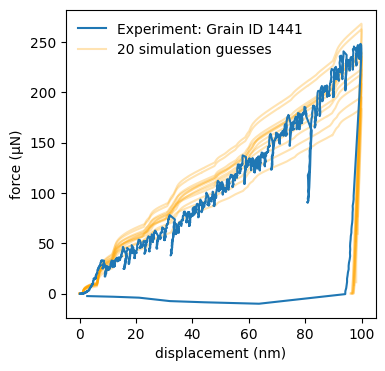

In [84]:
FD_Curves = np.load(f"{resultPath}/grain_1441_sr_0p1/initial/common/FD_Curves.npy", allow_pickle=True).tolist()

# Converting the unit
for params, dispForce in FD_Curves.items():
    dispForce["displacement"] = dispForce["displacement"] * 1e9
    dispForce["force"] = dispForce["force"] * 1e6

maxDispCorrespondingToMaxForce = -np.inf

for params, dispForce in FD_Curves.items():
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if maxDispCorrespondingToMaxForce < disp[np.argmax(force)]: 
        maxDispCorrespondingToMaxForce = disp[np.argmax(force)]

print(f"Max disp corresponding to max force: {maxDispCorrespondingToMaxForce}")

nonconverging_iters = []

for i, (params, dispForce) in enumerate(FD_Curves.items()):  
    disp = dispForce["displacement"]
    force = dispForce["force"]
    dispCorrespondingToMaxForce = disp[np.argmax(force)]
    if dispCorrespondingToMaxForce < maxDispCorrespondingToMaxForce - 2:
        nonconverging_iters.append(i)
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (nonconverging)")
    else:
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (converging)")
        # plt.plot(disp, force, color="orange", alpha=0.3)

plt.figure(figsize=(4,4))

for i, (params, dispForce) in enumerate(FD_Curves.items()):
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if i not in nonconverging_iters:
        plt.plot(disp, force, color="orange", alpha=0.3)

data = pd.read_excel(f"{targetPath}/grain_1441_sr_0p1/FD_Curve.xlsx", engine='openpyxl')

expForce = data["force/microN"] 
expDisplacement = data["displacement/nm"] 

plt.plot(expDisplacement, expForce, label=f"Experiment: Grain ID 1441")
plt.plot([], [], label=f"{len(FD_Curves)} simulation guesses", color="orange", alpha=0.3)
plt.xlabel("displacement (nm)")
plt.ylabel("force (µN)")
plt.legend(frameon=False)

#plt.title(r"Initial guess - grain 1441 | strain rate 0.1 $s^{-1}$ | n = 20")

print(f"Non converging iterations: {nonconverging_iters}")

Max disp corresponding to max force: 99.9995
Disp corresponding to max force: 99.957 (converging)
Disp corresponding to max force: 0.951952 (nonconverging)
Disp corresponding to max force: 99.957 (converging)
Disp corresponding to max force: 99.957 (converging)
Disp corresponding to max force: 0.951952 (nonconverging)
Disp corresponding to max force: 0.951952 (nonconverging)
Disp corresponding to max force: 99.997 (converging)
Disp corresponding to max force: 99.957 (converging)
Disp corresponding to max force: 0.951952 (nonconverging)
Disp corresponding to max force: 0.951952 (nonconverging)
Disp corresponding to max force: 95.1719 (nonconverging)
Disp corresponding to max force: 86.762 (nonconverging)
Disp corresponding to max force: 0.951952 (nonconverging)
Disp corresponding to max force: 99.9995 (converging)
Disp corresponding to max force: 99.937 (converging)
Disp corresponding to max force: 99.9748 (converging)
Disp corresponding to max force: 99.957 (converging)
Disp correspond

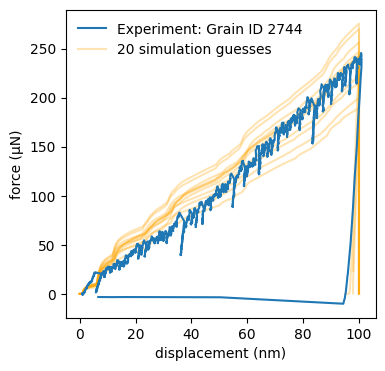

In [85]:
FD_Curves = np.load(f"{resultPath}/grain_2744_sr_0p1/initial/common/FD_Curves.npy", allow_pickle=True).tolist()

# Converting the unit
for params, dispForce in FD_Curves.items():
    dispForce["displacement"] = dispForce["displacement"] * 1e9
    dispForce["force"] = dispForce["force"] * 1e6

maxDispCorrespondingToMaxForce = -np.inf

for params, dispForce in FD_Curves.items():
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if maxDispCorrespondingToMaxForce < disp[np.argmax(force)]: 
        maxDispCorrespondingToMaxForce = disp[np.argmax(force)]

print(f"Max disp corresponding to max force: {maxDispCorrespondingToMaxForce}")

nonconverging_iters = []

for i, (params, dispForce) in enumerate(FD_Curves.items()):  
    disp = dispForce["displacement"]
    force = dispForce["force"]
    dispCorrespondingToMaxForce = disp[np.argmax(force)]
    if dispCorrespondingToMaxForce < maxDispCorrespondingToMaxForce - 2:
        nonconverging_iters.append(i)
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (nonconverging)")
    else:
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (converging)")
        # plt.plot(disp, force, color="orange", alpha=0.3)

plt.figure(figsize=(4,4))

for i, (params, dispForce) in enumerate(FD_Curves.items()):
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if i not in nonconverging_iters:
        plt.plot(disp, force, color="orange", alpha=0.3)

data = pd.read_excel(f"{targetPath}/grain_2744_sr_0p1/FD_Curve.xlsx", engine='openpyxl')

expForce = data["force/microN"] 
expDisplacement = data["displacement/nm"] 

plt.plot(expDisplacement, expForce, label=f"Experiment: Grain ID 2744")
plt.plot([], [], label=f"{len(FD_Curves)} simulation guesses", color="orange", alpha=0.3)
plt.xlabel("displacement (nm)")
plt.ylabel("force (µN)")
plt.legend(frameon=False)

#plt.title(r"Initial guess - grain 2744 | strain rate 0.1 $s^{-1}$ | n = 20")

print(f"Non converging iterations: {nonconverging_iters}")

Max disp corresponding to max force: 99.97919999999999
Disp corresponding to max force: 99.9198 (converging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 99.9198 (converging)
Disp corresponding to max force: 33.8725 (nonconverging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 99.9423 (converging)
Disp corresponding to max force: 99.93950000000001 (converging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 99.9169 (converging)
Disp corresponding to max force: 99.9198 (converging)
Disp corresponding to max force: 0.9532289999999999 (nonconverging)
Disp corresponding to max force: 99.9169 (converging)
Disp corresponding to max force: 1.18695 (nonconverging)
Disp corresponding to max force: 99

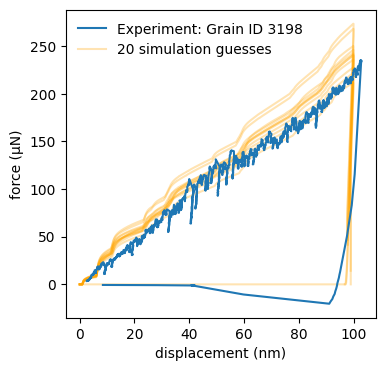

In [86]:
FD_Curves = np.load(f"{resultPath}/grain_3198_sr_0p1/initial/common/FD_Curves.npy", allow_pickle=True).tolist()

# Converting the unit
for params, dispForce in FD_Curves.items():
    dispForce["displacement"] = dispForce["displacement"] * 1e9
    dispForce["force"] = dispForce["force"] * 1e6

maxDispCorrespondingToMaxForce = -np.inf

for params, dispForce in FD_Curves.items():
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if maxDispCorrespondingToMaxForce < disp[np.argmax(force)]: 
        maxDispCorrespondingToMaxForce = disp[np.argmax(force)]

print(f"Max disp corresponding to max force: {maxDispCorrespondingToMaxForce}")

nonconverging_iters = []

for i, (params, dispForce) in enumerate(FD_Curves.items()):  
    disp = dispForce["displacement"]
    force = dispForce["force"]
    dispCorrespondingToMaxForce = disp[np.argmax(force)]
    if dispCorrespondingToMaxForce < maxDispCorrespondingToMaxForce - 2:
        nonconverging_iters.append(i)
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (nonconverging)")
    else:
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (converging)")
        # plt.plot(disp, force, color="orange", alpha=0.3)

plt.figure(figsize=(4,4))

for i, (params, dispForce) in enumerate(FD_Curves.items()):
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if i not in nonconverging_iters:
        plt.plot(disp, force, color="orange", alpha=0.3)

data = pd.read_excel(f"{targetPath}/grain_3198_sr_0p1/FD_Curve.xlsx", engine='openpyxl')

expForce = data["force/microN"] 
expDisplacement = data["displacement/nm"] 

plt.plot(expDisplacement, expForce, label=f"Experiment: Grain ID 3198")
plt.plot([], [], label=f"{len(FD_Curves)} simulation guesses", color="orange", alpha=0.3)
plt.xlabel("displacement (nm)")
plt.ylabel("force (µN)")
plt.legend(frameon=False)

#plt.title(r"Initial guess - grain 3198 | strain rate 0.1 $s^{-1}$ | n = 20")

print(f"Non converging iterations: {nonconverging_iters}")

Max disp corresponding to max force: 99.94700000000003
Disp corresponding to max force: 99.94700000000003 (converging)
Non converging iterations: []


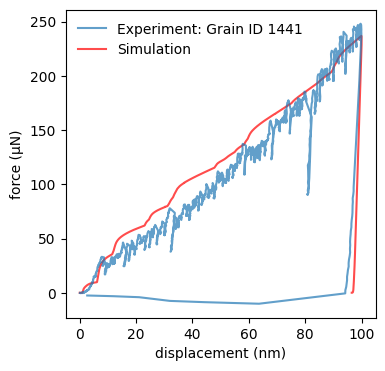

In [87]:
FD_Curves = np.load(f"{resultPath}/grain_1441_sr_0p1/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()

# Converting the unit
for params, dispForce in FD_Curves.items():
    dispForce["displacement"] = dispForce["displacement"] * 1e9
    dispForce["force"] = dispForce["force"] * 1e6

maxDispCorrespondingToMaxForce = -np.inf

for params, dispForce in FD_Curves.items():
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if maxDispCorrespondingToMaxForce < disp[np.argmax(force)]: 
        maxDispCorrespondingToMaxForce = disp[np.argmax(force)]

print(f"Max disp corresponding to max force: {maxDispCorrespondingToMaxForce}")

nonconverging_iters = []

for i, (params, dispForce) in enumerate(FD_Curves.items()):  
    disp = dispForce["displacement"]
    force = dispForce["force"]
    dispCorrespondingToMaxForce = disp[np.argmax(force)]
    if dispCorrespondingToMaxForce < maxDispCorrespondingToMaxForce - 2:
        nonconverging_iters.append(i)
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (nonconverging)")
    else:
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (converging)")
        # plt.plot(disp, force, color="orange", alpha=0.3)

plt.figure(figsize=(4,4))

for i, (params, dispForce) in enumerate(FD_Curves.items()):
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if i not in nonconverging_iters:
        plt.plot(disp, force, color="red", alpha=0.7)

data = pd.read_excel(f"{targetPath}/grain_1441_sr_0p1/FD_Curve.xlsx", engine='openpyxl')

expForce = data["force/microN"] 
expDisplacement = data["displacement/nm"] 

plt.plot(expDisplacement, expForce, label=f"Experiment: Grain ID 1441", alpha=0.7)
plt.plot([], [], label=f"Simulation", color="red", alpha=0.7)
plt.xlabel("displacement (nm)")
plt.ylabel("force (µN)")
plt.legend(frameon=False)

#plt.title(r"Initial guess - grain 1441 | strain rate 0.1 $s^{-1}$ | n = 20")

print(f"Non converging iterations: {nonconverging_iters}")

Max disp corresponding to max force: 96.36160000000002
Disp corresponding to max force: 96.36160000000002 (converging)
Non converging iterations: []


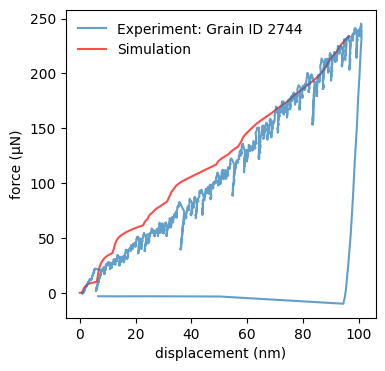

In [88]:
FD_Curves = np.load(f"{resultPath}/grain_2744_sr_0p1/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()

# Converting the unit
for params, dispForce in FD_Curves.items():
    dispForce["displacement"] = dispForce["displacement"] * 1e9
    dispForce["force"] = dispForce["force"] * 1e6

maxDispCorrespondingToMaxForce = -np.inf

for params, dispForce in FD_Curves.items():
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if maxDispCorrespondingToMaxForce < disp[np.argmax(force)]: 
        maxDispCorrespondingToMaxForce = disp[np.argmax(force)]

print(f"Max disp corresponding to max force: {maxDispCorrespondingToMaxForce}")

nonconverging_iters = []

for i, (params, dispForce) in enumerate(FD_Curves.items()):  
    disp = dispForce["displacement"]
    force = dispForce["force"]
    dispCorrespondingToMaxForce = disp[np.argmax(force)]
    if dispCorrespondingToMaxForce < maxDispCorrespondingToMaxForce - 2:
        nonconverging_iters.append(i)
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (nonconverging)")
    else:
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (converging)")
        # plt.plot(disp, force, color="orange", alpha=0.3)

plt.figure(figsize=(4,4))

for i, (params, dispForce) in enumerate(FD_Curves.items()):
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if i not in nonconverging_iters:
        plt.plot(disp, force, color="red", alpha=0.7)

data = pd.read_excel(f"{targetPath}/grain_2744_sr_0p1/FD_Curve.xlsx", engine='openpyxl')

expForce = data["force/microN"] 
expDisplacement = data["displacement/nm"] 

plt.plot(expDisplacement, expForce, label=f"Experiment: Grain ID 2744", alpha=0.7)
plt.plot([], [], label=f"Simulation", color="red", alpha=0.7)
plt.xlabel("displacement (nm)")
plt.ylabel("force (µN)")
plt.legend(frameon=False)

#plt.title(r"Initial guess - grain 2744 | strain rate 0.1 $s^{-1}$ | n = 20")

print(f"Non converging iterations: {nonconverging_iters}")

Max disp corresponding to max force: 99.9198
Disp corresponding to max force: 99.9198 (converging)
Non converging iterations: []


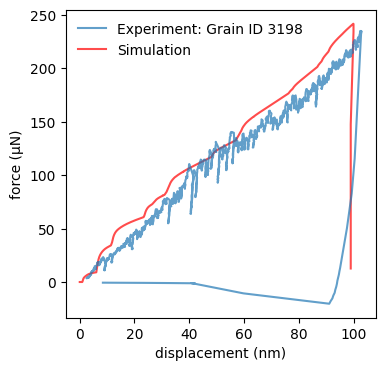

In [90]:
FD_Curves = np.load(f"{resultPath}/grain_3198_sr_0p1/iteration/common/FD_Curves.npy", allow_pickle=True).tolist()

# Converting the unit
for params, dispForce in FD_Curves.items():
    dispForce["displacement"] = dispForce["displacement"] * 1e9
    dispForce["force"] = dispForce["force"] * 1e6

maxDispCorrespondingToMaxForce = -np.inf

for params, dispForce in FD_Curves.items():
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if maxDispCorrespondingToMaxForce < disp[np.argmax(force)]: 
        maxDispCorrespondingToMaxForce = disp[np.argmax(force)]

print(f"Max disp corresponding to max force: {maxDispCorrespondingToMaxForce}")

nonconverging_iters = []

for i, (params, dispForce) in enumerate(FD_Curves.items()):  
    disp = dispForce["displacement"]
    force = dispForce["force"]
    dispCorrespondingToMaxForce = disp[np.argmax(force)]
    if dispCorrespondingToMaxForce < maxDispCorrespondingToMaxForce - 2:
        nonconverging_iters.append(i)
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (nonconverging)")
    else:
        print(f"Disp corresponding to max force: {disp[np.argmax(force)]} (converging)")
        # plt.plot(disp, force, color="orange", alpha=0.3)

plt.figure(figsize=(4,4))

for i, (params, dispForce) in enumerate(FD_Curves.items()):
    disp = dispForce["displacement"]
    force = dispForce["force"]
    if i not in nonconverging_iters:
        plt.plot(disp, force, color="red", alpha=0.7)

data = pd.read_excel(f"{targetPath}/grain_3198_sr_0p1/FD_Curve.xlsx", engine='openpyxl')

expForce = data["force/microN"] 
expDisplacement = data["displacement/nm"] 

plt.plot(expDisplacement, expForce, label=f"Experiment: Grain ID 3198", alpha=0.7)
plt.plot([], [], label="Simulation", color="red", alpha=0.7)
plt.xlabel("displacement (nm)")
plt.ylabel("force (µN)")
plt.legend(frameon=False)

#plt.title(r"Initial guess - grain 3198 | strain rate 0.1 $s^{-1}$ | n = 20")

print(f"Non converging iterations: {nonconverging_iters}")